# Mass Transfer

## Diffusivity 
Vignes, A., Ind. Eng, Chem. Fundam. 5:184 (1966):
$$D_{AB}=D_{AB}^{o,x_B}D_{BA}^{o,x_A}\beta_A$$

Siddiqi-Lucas, Can. J. Chem. Eng. 64:839 (1986):
$$D_{AB}^{o}=\frac{9.89x10^{-8}(V_B^{0.265})T}{V_A^{0.45}\mu_B^{0.907}}$$

$$\beta_A=1+\frac{\delta ln\gamma_A}{\delta ln x_A}$$

where:

$V_i=\frac{1}{\rho_i}$ is molar volume of species i, $\left[\frac{cm^3}{mol}\right]$

$\gamma_i$ is the activity coefficient of species i

$\mu_i$ is the viscosity of species i, $\left[mPa-s\right]$

$x_i$ is the mole fraction of species i 
$D_{AB}^{o}$ is the mutual diffusivity at infinite dilution of A in B, $\left[\frac{cm^2}{s}\right]$

## Scatchard-Hildebrand Theory
Elliot & Lira, Introductory Chemical Engineering Thermodynamics (2012). 

$$RTln \gamma_i=V_i\phi^2_j(\delta_i-\delta_j)^2$$
$$\phi_i=\frac{x_iV_i}{\Sigma_i{ x_iV_i}}$$
$$\delta_i=\sqrt{\frac{\Delta U_i^{vap}}{V_i}}, \left[\frac{J}{cm^3}\right]$$



Green & Southard, Perry's Chemical Engineer's Handbook (2019). 
$$R= 8.3144 \left[\frac{J}{mol-K}\right]$$
$\Delta U_{vap}$ was interpolated from tabulated data in Perry's

$\mu_i$ was calculated from thermodynamic data in Perry's using the following formula:
$$\mu = exp(C_1+\frac{C_2}{T}+C_3ln(T)+C_4T^{C_5})$$

$\rho_i$ calculated from thermodynamic data in Perry's using the following formula:
$$\rho = \frac{C_1}{C_2^{1+(1-\frac{T}{C_3})^{C_4}}}$$

# Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Methane Properties:
    # Density [mol/dm^3]: 90.6-190.56K
dm1=2.9214
dm2=0.28976
dm3=190.56
dm4=0.28881

    #Viscosity [Pa-s]: 90.69-188K
vm1=-6.1572
vm2=178.15
vm3=-0.95239
vm4=-9.0606e-24
vm5=10
MW_m=16.0425 #[g/mol]

MW_m=16.0425 #[g/mol]
# Internal Energy [kJ/mol]
T_iem=np.array([90.694,100,105,110,115,120,125,130,135,140])
U_mL=np.array([-1.1522,-0.64728,-.37306,-0.096585,0.18242,0.46425,0.74927,1.0379,1.3307,1.6284])
U_mV=np.array([6.8310,7.0469,7.1582,7.2654,7.3680,7.4652,7.5562,7.6403,7.7165,7.7837])
ΔU_vapm=U_mV-U_mL


In [ ]:
# Oxygen Properties:
    # Density [mol/dm^3]: 54.36-154.58 K
do1=3.9143
do2=0.28772
do3=154.58
do4=0.2924

    #Viscosity [Pa-s]: 54.36-150 K
vo1=-4.1476
vo2=94.04
vo3=-1.207
vo4=0
vo5=0

MW_o=31.9988

# Internal Energy [kJ/mol]
T_ieo=np.array([90,95,100,105,110,115,120,125,130,135,140])
U_oL=np.array([-4.2806,-4.0084,-3.7263,-3.4556,-3.1732,-2.8853,-2.5904,-2.2867,-1.9711,-1.6394,-1.2839])
U_oV=np.array([1.8209,1.9031,1.9772,2.0421,2.0966,2.1391,2.1678,2.1801,2.1722,2.1380,2.0670])
ΔU_vapo=U_oV-U_oL

R=8.3144 #[J/g/K] 
R_m=R*MW_m #[J/mol/K]
R_o=R*MW_o #[J/mol/K]

In [4]:
def Density(T,d1,d2,d3,d4):
    ρ=d1/(d2**(1+(1-(T/d3))**d4))
    return(ρ)
def V_i(T,d1,d2,d3,d4):
    V=1/(d1/(d2**(1+(1-(T/d3))**d4)))
    return(V)
def Latent_Heat(T,Tc,h1,h2,h3,h4):
    Tr=T/Tc
    Hv=h1*(1-Tr)**(h2+h3*Tr+h4*Tr**2)
    return Hv
def Viscosity(T,v1,v2,v3,v4,v5):
    μ=np.exp(v1+v2/T+v3*np.log(T)+v4*T**v5)
    return (μ)

In [41]:
T=np.linspace(92,122,7)#97
x_m=np.linspace(0.001,.999,100)#.
x_o=1-x_m
V_m=np.zeros(len(T))
V_o=np.zeros(len(T))
ΔU_m=np.zeros(len(T))
ΔU_o=np.zeros(len(T))
δ_m=np.zeros(len(T))
δ_o=np.zeros(len(T))
Φ_m=[[0]*len(x_m)]*len(T)
γ_m=[[0]*len(x_m)]*len(T)
Φ_o=[[0]*len(x_m)]*len(T)
γ_m=[[0]*len(x_m)]*len(T)
γ_o=[[0]*len(x_m)]*len(T)
β_m=[[.1]*len(x_m)]*len(T)
D_0MO=np.zeros(len(T))
D_0OM=np.zeros(len(T))
D_MO=[[0]*len(x_m)]*len(T)
GE=[[0]*len(x_m)]*len(T)

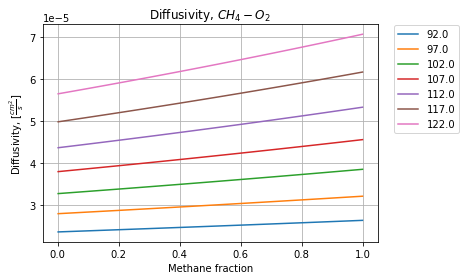

In [61]:
i,j=(0,0)
for i in range(0,len(T)):
    V_m[i]=V_i(T[i],dm1,dm2,dm3,dm4) #dm^3/mol
    V_o[i]=V_i(T[i],do1,do2,do3,do4) #dm^3/mol
    ΔU_m[i]=np.interp(T[i],T_iem,ΔU_vapm)*1000 #[J/mol]
    ΔU_o[i]=np.interp(T[i],T_ieo,ΔU_vapo)*1000 #[J/mol]
    D_0MO[i]=9.89e-8*(1000*V_o[i])**0.265*T[i]/((1000*V_m[i])**0.45*Viscosity(T[i],vo1,vo2,vo3,vo4,vo5)*1000)
    D_0OM[i]=9.89e-8*(1000*V_m[i])**0.265*T[i]/((1000*V_o[i])**0.45*Viscosity(T[i],vm1,vm2,vm3,vm4,vm5)*1000)
    δ_m[i]=np.sqrt((ΔU_m[i])/V_m[i]) #(J/dm^3)^.5
    δ_o[i]=np.sqrt((ΔU_o[i])/V_o[i]) #(J/dm^3)^.5
    for j in range(0,len(x_m)):
        Φ_m[i][j]=(V_m[i]*x_m[j])/(V_m[i]*x_m[j]+V_o[i]*x_o[j])
        Φ_o[i][j]=(V_o[i]*x_o[j])/(V_m[i]*x_m[j]+V_o[i]*x_o[j])
        γ_m[i][j]=np.exp((V_m[i]*Φ_o[i][j]**2*(δ_m[i]-δ_o[i])**2)/(R_m*T[i]))
        γ_o[i][j]=np.exp((V_o[i]*Φ_m[i][j]**2*(δ_m[i]-δ_o[i])**2)/(R_o*T[i]))
        β_m[i][j]=β_m[i][j]=1+(np.log(γ_m[i][j])/np.log(x_m[i]))
        D_MO[i][j]=D_0MO[i]**x_o[j]*D_0OM[i]**x_m[j]*β_m[i][j]**.4 #cm^2/s
        GE[i][j]=Φ_o[i][j]*Φ_m[i][j]*(δ_o[i]-δ_m[i])**2*(x_m[j]*V_m[i]+x_o[j]*V_o[i])/1000
        j=j+1
    i=i+1
    plt.plot(x_m,D_MO[i-1],label=T[i-1])
plt.legend(loc=[1.05,.5])
plt.xlabel("Methane fraction")
plt.ylabel(r"Diffusivity, $[\frac{cm^2}{s}]$")
plt.title(r"Diffusivity, $CH_4-O_2$")
plt.grid()
plt.show()

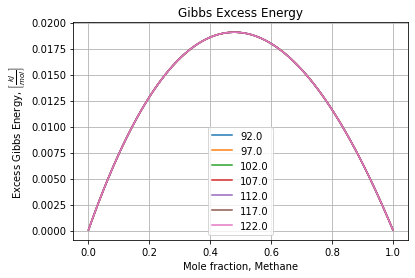

In [57]:
i=0
for i in range(0,len(T)):
    plt.plot(x_m,GE[i],label=T[i])
    i=i+1
plt.legend()
plt.ylabel(r"Excess Gibbs Energy, $\left[\frac{kJ}{mol}\right]$ ")
plt.xlabel("Mole fraction, Methane")
plt.title("Gibbs Excess Energy")
plt.grid()
plt.show()

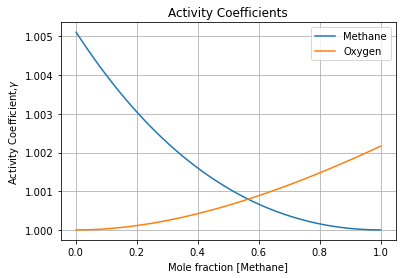

In [69]:
plt.plot(x_m,γ_m[i-1],label="Methane")
plt.plot(x_m,γ_o[i-1],label="Oxygen")
plt.legend()
plt.ylabel(r"Activity Coefficient,$\gamma$")
plt.xlabel("Mole fraction [Methane]")
plt.title("Activity Coefficients")
plt.grid()
plt.show()

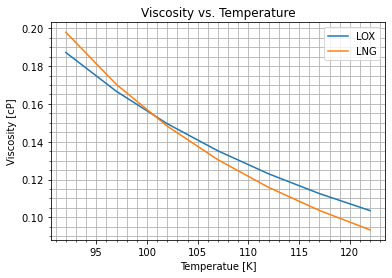

In [88]:
LOX_VI=Viscosity(T,vo1,vo2,vo3,vo4,vo5)*1000
LNG_VI=Viscosity(T,vm1,vm2,vm3,vm4,vm5)*1000
plt.plot(T,LOX_VI,label='LOX')
plt.plot(T,LNG_VI,label='LNG')
plt.grid(b='true',which='minor')
plt.grid(b='true',which='major')
plt.xlabel("Temperatue [K]")
plt.ylabel("Viscosity [cP]")
plt.title("Viscosity vs. Temperature")
plt.legend()
plt.minorticks_on()
plt.show()